# **Laboratorio 11: Introducción al modelo de Regresión Lineal**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Alejandro Narváez - 202123110
2.   Ali Cifci - 202210698

**Número del grupo**

LabML-4 10

# **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que predice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $\beta$. La búsqueda de los parámetros de la ecuación, es decir, $\beta$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamiento es fundamental en ingeniería.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:

\begin{align*}
  y^* = g(x; \beta)=β_{0} + \beta_1 x,\\
\end{align*}

donde los $\beta_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $\beta$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};\beta)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{\beta\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};\beta \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión:


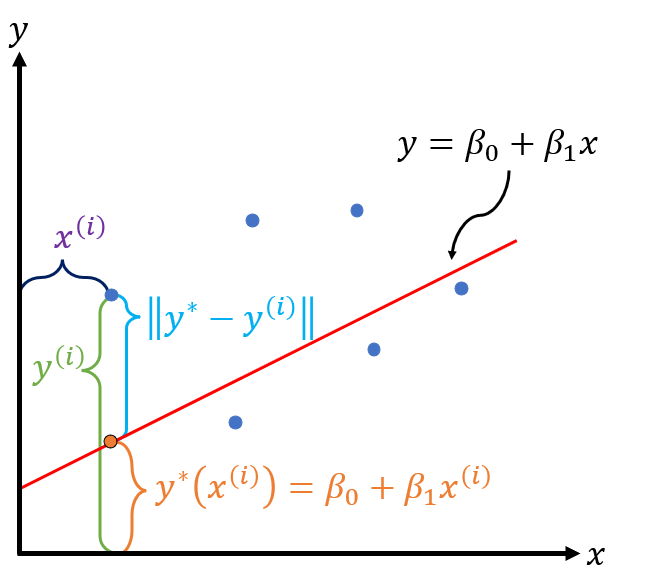


Aquí, $\beta = [\beta_0, \beta_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( β_{0} + \beta_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $β_{0} + \beta_1 x^{(j)}$, se puede escribir vectorialmente como:


\begin{align*}
  \beta_{0} + \beta_1 x^{(j)} = [1, x^{(j)}] \beta
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:

\begin{align*}
   \begin{bmatrix}
      β_{0} + \beta_1 x^{(1)}\\
      β_{0} + \beta_1 x^{(2)}\\
      \vdots\\
      β_{0} + \beta_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1
   \end{bmatrix}
\end{align*}

La matriz que acompaña a $\beta$ se nombrará $H$. El problema de optimización se reescribe entonces como :

 \begin{align*}
   \min_{\beta\in\mathbb{R}^n}||y-H\beta||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.

La solución a este problema se denota $\beta^*=[\beta_0^*,\beta_1^*]^T$, los cuales son los coeficientes que resuelven el problema. El potencial de este método radica en su solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Esta solución es:

\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .
 \end{align*}

Usando el mismo procedimiento, se pueden realizar proceso de regresión para ecuaciones con un grado polinómico más alto, como por ejemplo:

\begin{align*}
   y = g(x;\beta)=\sum_{i=0}^{n} \beta_i x^i
\end{align*}

Si rescribe lo anterior de forma matricial para todos los $m$ puntos, queda:

\begin{align*}
   \begin{bmatrix}
      1 & x^{(1)} & \left(x^{(1)}\right)^2 & \cdots & \left(x^{(1)}\right)^n\\
      1 & x^{(2)} & \left(x^{(2)}\right)^2 & \cdots & \left(x^{(2)}\right)^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots \\
      1 & x^{(m)} & \left(x^{(m)}\right)^2 & \cdots & \left(x^{(m)}\right)^n\\
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_n
   \end{bmatrix}
\end{align*}

Donde la matriz que acompaña el vector $\beta$ es la nueva matriz $H$, por lo que, al final, la solución analítica se encuentra mediante la misma ecuación mencionada. Cabe resaltar que, con la lógica anterior, es posible encontrar analíticamente los coeficientes para cualquier ecuación deseada, por ejemplo, si se quisiera una combinación de funciones trigonométricas, es decir:

\begin{align*}
  y^*=\beta_0 + \beta_1\cos(x) + \beta_2\sin(x)
\end{align*}

Solo bastaría con modificar la matriz $H$ y solucionar el problema de la misma manera.


# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, que permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas para atender sus condiciones particulares de movimiento. Para determinar el valor de estas variables se estima inicialmente la aceleración del cuerpo de estudio a través del análisis de video o con el uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmente estimar la aceleración. Es fundamental que durante la medición de señales de posición, las posiciones estudiadas no varíen rápidamente entre sí para evitar la captura de ruido y obtener mediciones precisas.

# **Descripción de la práctica**

En esta prática se desea construir un modelo de Regresión que permita predecir la trayectoria que sigue el codo al abrir y cerrar una puerta, tal y como se muestra en el siguiente esquema:



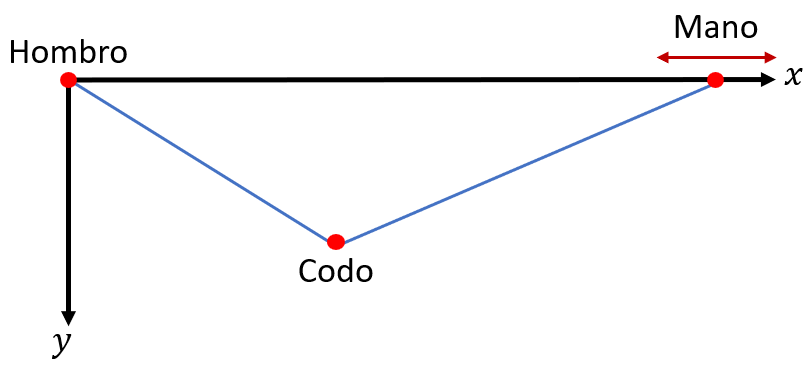

Para efectos de la prática, se definirán las siguientes variables:

- $t$: Tiempo transcurrido
- $x$: Posición horizontal del codo
- $y$: Posición vertical del codo

1. Importe los datos del archivo *regresion.xlsx*, donde la primera columna corresponde al tiempo $(t)$, la segunda a la posición horizontal $(x)$ y la tercera a la vertical $(y)$. Luego, construya los siguientes gráficos de dispersión (scatter):

- Posición vertical en función del tiempo ($t$, $y$)
- Posición vertical en función de la posición horizontal ($x$, $y$)


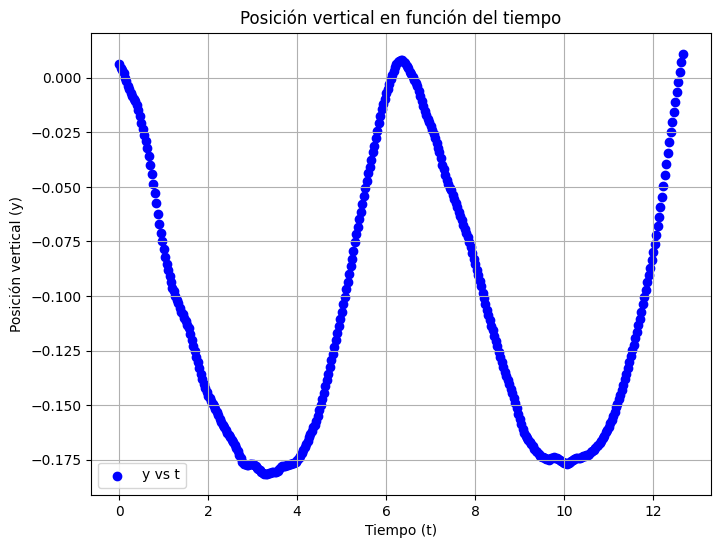

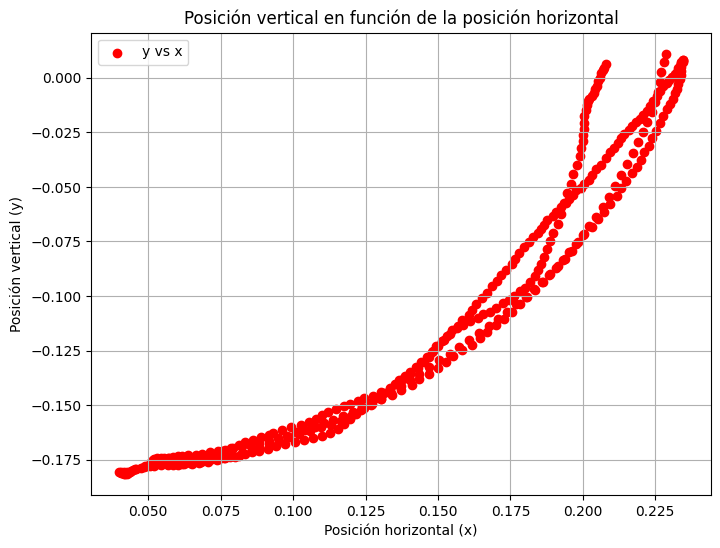

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Importar los datos del archivo regresion.xlsx
data = pd.read_excel('C:/Users/alejo/OneDrive/Documents/°U/Machine Learning/Fundamentos de Machine learning/Laboratorio/Labs_Mach_L/Lab_machine/Archivos/regresion.xlsx')

# Renombrar las columnas para que correspondan a t, x, y (si no están nombradas así)
data.columns = ['t', 'x', 'y']
t = data.iloc[:, 0]  # Tiempo
x = data.iloc[:, 1]  # Posición horizontal
y = data.iloc[:, 2]  # Posición vertical

# 2. Crear los gráficos de dispersión
# Gráfico 1: Posición vertical (y) en función del tiempo (t)
plt.figure(figsize=(8, 6))
plt.scatter(data['t'], data['y'], color='blue', label='y vs t')
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición vertical (y)')
plt.title('Posición vertical en función del tiempo')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: Posición vertical (y) en función de la posición horizontal (x)
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='red', label='y vs x')
plt.xlabel('Posición horizontal (x)')
plt.ylabel('Posición vertical (y)')
plt.title('Posición vertical en función de la posición horizontal')
plt.grid(True)
plt.legend()
plt.show()

2. Implemente una función que reciba como argumentos el grado polinómico $n$ y un arreglo con los datos de la variable independiente, y que retorne la matriz $H$ correspondiente al grado polinómico.

In [15]:
import numpy as np

#Como valores de entrada se obtiene la matrix de valores de x y el grado polinomico n.
def matriz_H(x, n):
    H = np.vander(x, N=n+1, increasing=True) #Se genera la matriz H con las dimensiones n+1. La función vander permite crear una columna de 1s.
    return H

3. Implemente una función que reciba como argumentos la matriz $H$ y el arreglo de valores de la variable dependiente. Esta función debe retornar el arreglo de $\beta^*$.

In [16]:
def beta_optimo(H, y):
    # Fórmula de mínimos cuadrados: β* = (HᵀH)⁻¹ Hᵀ y
    HtH_inv = np.linalg.inv(H.T @ H)
    Ht_y = H.T @ y
    beta = HtH_inv @ Ht_y
    return beta

4. Utilice las funciones que implementó en los puntos anteriores para encontrar los coeficientes óptimos de las siguientes relaciones:

- $y$ vs $t$
- $y$ vs $x$

Con cada uno con los siguientes grados polinómicos:

- Grado 1
- Grado 3
- Grado 5
- Grado 9

In [19]:
grados = [1, 3, 5, 9]

for g in grados:
    H_t = matriz_H(t, g)
    beta_t = beta_optimo(H_t, y)
    print(f"Coeficientes para y vs t (grado {g}): {beta_t}")

    H_x = matriz_H(x, g)
    beta_x = beta_optimo(H_x, y)
    print(f"Coeficientes para y vs x (grado {g}): {beta_x}")


Coeficientes para y vs t (grado 1): [-0.09876791 -0.0012476 ]
Coeficientes para y vs x (grado 1): [-0.24953635  0.97424629]
Coeficientes para y vs t (grado 3): [-0.06427292 -0.02828624  0.00465352 -0.00022076]
Coeficientes para y vs x (grado 3): [-0.15368709 -0.82059514  7.40264206 -4.08043073]
Coeficientes para y vs t (grado 5): [ 5.94112013e-02 -1.96530306e-01  4.72879475e-02 -1.21102920e-03
 -4.63885324e-04  2.85710270e-05]
Coeficientes para y vs x (grado 5): [-1.64627869e-01 -1.22379764e+00  3.21376974e+01 -3.41870904e+02
  1.75091419e+03 -3.10397309e+03]
Coeficientes para y vs t (grado 9): [ 2.59351846e-02 -1.70542514e-01  1.38464300e-01 -8.99717638e-02
  2.86093990e-02 -4.09735956e-03  1.97442679e-04  1.06973290e-05
 -1.43218628e-06  4.00646858e-08]
Coeficientes para y vs x (grado 9): [-1.99535125e+00  1.71132893e+02 -6.89018073e+03  1.55431876e+05
 -2.16350905e+06  1.92841804e+07 -1.10187716e+08  3.89842593e+08
 -7.76477030e+08  6.64767150e+08]


5. Teniendo en cuenta los resultados del punto anterior, grafique nuevamente la dispersión inicial de los datos agregando esta vez las curvas obtenidas para cada conjunto de datos. El primer gráfico, debe incluir la dispersión entre la posición vertical $y$ y el tiempo $t$ y las tres curvas de regresión obtenidas para cada grado polinómico en este conjunto de datos. El segundo gráfico debe mostrar las mismas curvas anteriores pero para el conjunto de datos de la posición vertical $y$ y la posición horizontal $x$. Los gráficos esperados deberían tener la siguiente estructura:


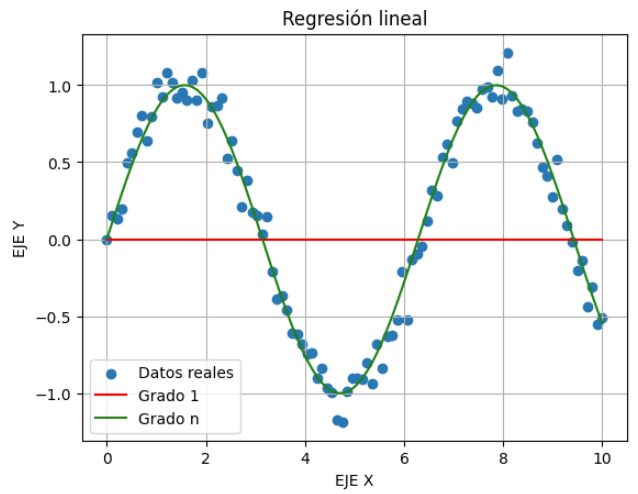

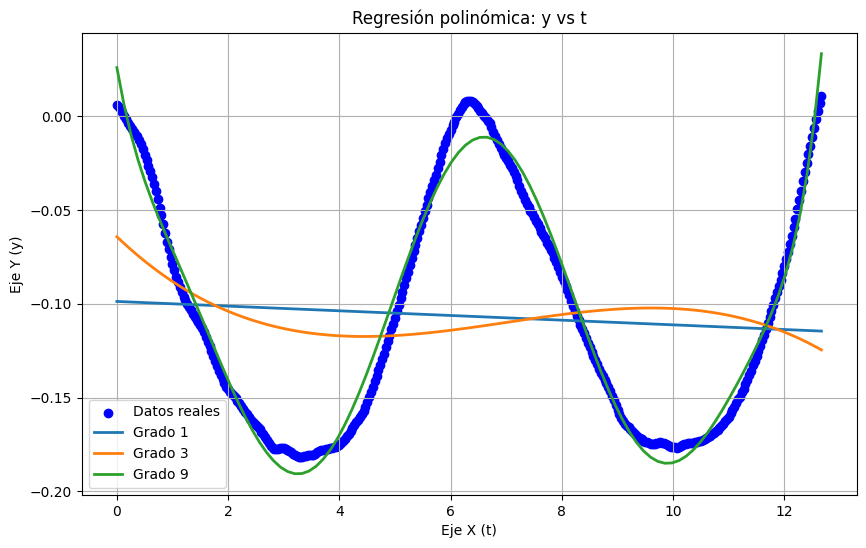

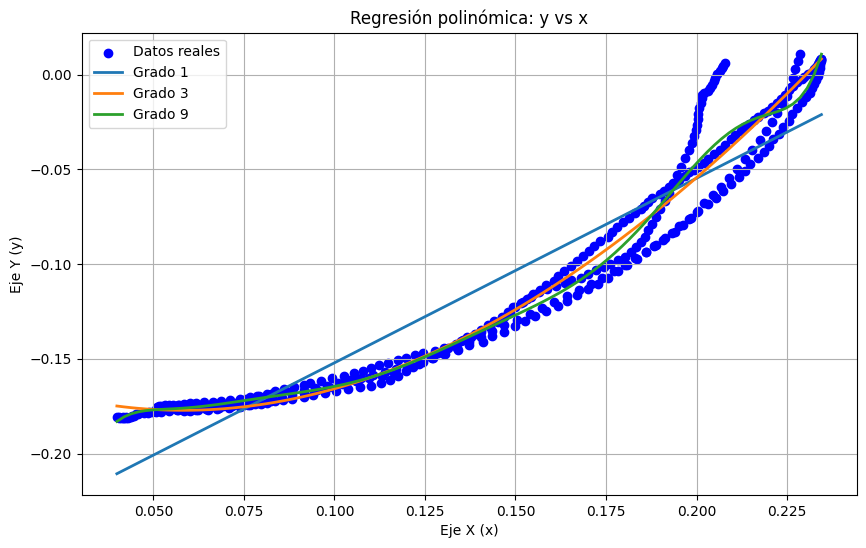

In [23]:
# Crear puntos para las curvas suaves (más puntos para una mejor visualización)
t_smooth = np.linspace(min(data['t']), max(data['t']), 100)
x_smooth = np.linspace(min(data['x']), max(data['x']), 100)

# Gráfico 1: y vs t
plt.figure(figsize=(10, 6))
plt.scatter(data['t'], data['y'], color='blue', label='Datos reales')

for g in grados:
    # Calcular la matriz H y los coeficientes beta para el grado g
    H_t = matriz_H(data['t'], g)
    beta_t = beta_optimo(H_t, data['y'])
    
    # Generar la matriz H para los puntos suaves
    H_t_smooth = matriz_H(t_smooth, g)
    # Calcular y predicha para los puntos suaves: y = H @ beta
    y_t_smooth = H_t_smooth @ beta_t
    
    # Graficar la curva de regresión
    plt.plot(t_smooth, y_t_smooth, label=f'Grado {g}', linewidth=2)

plt.xlabel('Eje X (t)')
plt.ylabel('Eje Y (y)')
plt.title('Regresión polinómica: y vs t')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico 2: y vs x
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Datos reales')

for g in grados:
    # Calcular la matriz H y los coeficientes beta para el grado g
    H_x = matriz_H(data['x'], g)
    beta_x = beta_optimo(H_x, data['y'])
    
    # Generar la matriz H para los puntos suaves
    H_x_smooth = matriz_H(x_smooth, g)
    # Calcular y predicha para los puntos suaves: y = H @ beta
    y_x_smooth = H_x_smooth @ beta_x
    
    # Graficar la curva de regresión
    plt.plot(x_smooth, y_x_smooth, label=f'Grado {g}', linewidth=2)

plt.xlabel('Eje X (x)')
plt.ylabel('Eje Y (y)')
plt.title('Regresión polinómica: y vs x')
plt.grid(True)
plt.legend()
plt.show()

6. Note que el conjunto de datos de la posición vertical en función del tiempo tiene un comportamiento oscilatorio. Implemente una función que reciba como argumento el arreglo de datos asociados a la variable independiente y que retorne la matriz $H$ que satisfaga la relación:

\begin{align*}
  y^*=\beta_0 + \beta_1\sin(t) + \beta_2\cos(t)
\end{align*}

In [ ]:
def matrixH_trig(t_data):
    # Número de puntos de datos
    m = len(t_data)
    # Crear la matriz H de tamaño (m, 3) para los términos 1, sin(t) y cos(t)
    H = np.zeros((m, 3))
    # Llenar las columnas de H
    H[:, 0] = 1  # Término constante (beta_0)
    H[:, 1] = np.sin(t_data)  # Término para beta_1 * sin(t)
    H[:, 2] = np.cos(t_data)  # Término para beta_2 * cos(t)
    return H

7. Calcule los parámetros óptimos $\beta^*$ que ajustan el conjunto de datos ($t, y$) a la relación trigonométrica anterior.

In [25]:
# Calcular la matriz H para el modelo trigonométrico
H_trig = matrixH_trig(data['t'])

# Calcular los parámetros óptimos beta usando la función beta_optimo
beta_trig = beta_optimo(H_trig, data['y'])

# Imprimir los resultados
print("Parámetros óptimos beta* para el modelo trigonométrico (y vs t):")
print(f"beta_0: {beta_trig[0]}")
print(f"beta_1 (sin(t)): {beta_trig[1]}")
print(f"beta_2 (cos(t)): {beta_trig[2]}")

Parámetros óptimos beta* para el modelo trigonométrico (y vs t):
beta_0: -0.10754661449126157
beta_1 (sin(t)): 0.024707980214936556
beta_2 (cos(t)): 0.08024587797224246


8. Grafique la dispersión inicial de la posición vertical $y$ en función del tiempo $t$ agregando la regresión polinómica de grado 9 calculada previamente y la regresión trigonométrica que acaba de obtener.

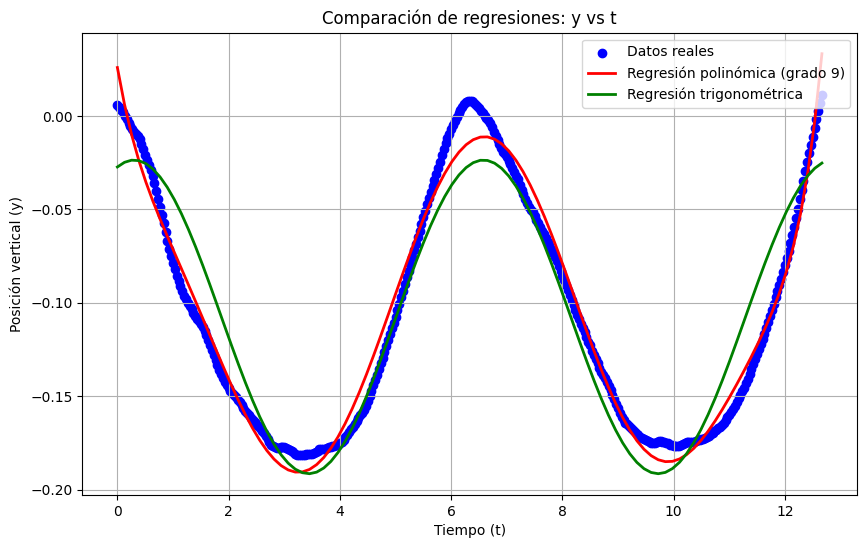

In [30]:
# Crear puntos suaves para las curvas (para una visualización más fluida)
t_smooth = np.linspace(min(data['t']), max(data['t']), 100)

# Calcular los coeficientes para la regresión polinómica de grado 9
g = 9
H_poly = matriz_H(data['t'], g)  # Matriz H para la regresión polinómica
beta_poly = beta_optimo(H_poly, data['y'])  # Coeficientes para grado 9

# Calcular los coeficientes para la regresión trigonométrica
H_trig = matrixH_trig(data['t'])  # Matriz H para la regresión trigonométrica
beta_trig = beta_optimo(H_trig, data['y'])  # Coeficientes para el modelo trigonométrico

# Generar las predicciones para los puntos suaves
# Para la regresión polinómica
H_poly_smooth = matriz_H(t_smooth, g)
y_poly_smooth = H_poly_smooth @ beta_poly

# Para la regresión trigonométrica
H_trig_smooth = matrixH_trig(t_smooth)
y_trig_smooth = H_trig_smooth @ beta_trig

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(data['t'], data['y'], color='blue', label='Datos reales')  # Dispersión inicial
plt.plot(t_smooth, y_poly_smooth, color='red', label='Regresión polinómica (grado 9)', linewidth=2)  # Curva polinómica
plt.plot(t_smooth, y_trig_smooth, color='green', label='Regresión trigonométrica', linewidth=2)  # Curva trigonométrica
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición vertical (y)')
plt.title('Comparación de regresiones: y vs t')
plt.grid(True)
plt.legend()
plt.show()

9. Implemente una función que calcule el error cuadrático medio (MSE) entre los valores $y$ medidos y las predicciones que se obtienen usando la regresión polinómica (grados 1,3,5 y 9) y trigonométrica para el conjunto de datos ($t, y$). Imprima de forma adecuada estos valores.

In [32]:
# Función para calcular el MSE
def calculate_mse(y_true, y_pred):
    m = len(y_true)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Grados polinómicos a evaluar
grados = [1, 3, 5, 9]

# Calcular el MSE para las regresiones polinómicas
print("MSE para las regresiones polinómicas (y vs t):")
for g in grados:
    # Calcular la matriz H y los coeficientes beta para el grado g
    H_poly = matriz_H(data['t'], g)
    beta_poly = beta_optimo(H_poly, data['y'])
    
    # Calcular las predicciones: y_pred = H @ beta
    y_pred_poly = H_poly @ beta_poly
    
    # Calcular el MSE
    mse_poly = calculate_mse(data['y'], y_pred_poly)
    print(f"Grado {g}: {mse_poly}")

# Calcular el MSE para la regresión trigonométrica
print("\nMSE para la regresión trigonométrica (y vs t):")
H_trig = matrixH_trig(data['t'])
beta_trig = beta_optimo(H_trig, data['y'])

# Calcular las predicciones: y_pred = H @ beta
y_pred_trig = H_trig @ beta_trig

# Calcular el MSE
mse_trig = calculate_mse(data['y'], y_pred_trig)
print(f"Regresión trigonométrica: {mse_trig}")

MSE para las regresiones polinómicas (y vs t):
Grado 1: 0.003928129565717373
Grado 3: 0.0038246490210486622
Grado 5: 0.0007098524753949077
Grado 9: 8.231381834681494e-05

MSE para la regresión trigonométrica (y vs t):
Regresión trigonométrica: 0.0003921265015428163


10. Teniendo el cuenta los valores de la función objetivo, responda:

- Para el gráfico de $y$ vs $t$, ¿cuál grado fue mejor?
- Para el gráfico de $y$ vs $x$, ¿cuál grado fue mejor?
- ¿Qué diferencias encuentra en los resultados de regresión para el conjunto de datos ($t$,$x$) en comparación con el conjunto ($x$,$y$)?
- ¿Considera que la regresión con funciones trigonométricas tuvo mejores o peores resultados que la regresión polinómica?
- Aumente el grado polinómico por encima de 10 y analice los resultados para ambos conjuntos de datos, $(t,y)$ y $(x,y)$. ¿Cree que aumentar el grado polinómico hará que el error tienda a cero?

-   Desde el punto de vista del MSE, el grado 9 probablemente fue el mejor (menor error). Sin embargo, considerando el riesgo de sobreajuste, un grado intermedio como 5 podría ser una mejor opción para un ajuste más robusto y generalizable. Esto lo confirmamos con el gráfico del punto 5, donde el grado 9 seguía de cerca los puntos, pero mostraba oscilaciones excesivas, mientras que grados como 5 ofrecían un ajuste más suave.
- Desde el punto de vista del MSE, el grado 9 probablemente fue el mejor (menor error). Sin embargo, considerando el riesgo de sobreajuste, un grado intermedio como 5 podría ser una mejor opción para un ajuste más robusto y generalizable. Esto lo confirmamos con el gráfico del punto 5, donde el grado 9 seguía de cerca los puntos, pero mostraba oscilaciones excesivas, mientras que grados como 5 ofrecían un ajuste más suave.
- Sin los valores exactos de MSE para 𝑦 vs 𝑥, podemos inferir que el grado 9 probablemente tenga el MSE más bajo, pero nuevamente con riesgo de sobreajuste. Un grado intermedio como 5 podría ser el mejor balance entre ajuste y generalización, como vimos en el gráfico del punto 5, donde el grado 5 capturaba las tendencias principales sin oscilaciones excesivas.
- La principal diferencia es que 𝑦 vs 𝑡 muestra un comportamiento oscilatorio (periódico), mientras que 𝑦 vs 𝑥 muestra una relación no lineal más suave, sin periodicidad clara. Esto sugiere que 𝑡 (tiempo) es un mejor predictor para capturar patrones oscilatorios en 𝑦, mientras que 𝑥 (posición horizontal) describe una relación más estructural entre las coordenadas del codo.
- La regresión trigonométrica tuvo mejores resultados que la regresión polinómica en términos de interpretación y generalización, ya que el modelo 𝑦∗=𝛽0+𝛽1sin(𝑡)+𝛽2cos(𝑡)y∗ =β0+β1sin(t)+β2cos(t) es más adecuado para datos oscilatorios como los de 𝑦 vs 𝑡. Aunque el grado 9 polinómico podría tener un MSE más bajo, su ajuste es menos natural y más propenso al sobreajuste. La regresión trigonométrica captura el comportamiento físico del movimiento del codo de manera más efectiva.
- Aumentar el grado polinómico por encima de 10 reducirá el MSE para ambos conjuntos (𝑡,𝑦) y (𝑥,𝑦), y teóricamente puede hacer que el error tienda a cero si el grado es suficientemente alto. Sin embargo, esto no es práctico, ya que el sobreajuste empeorará, y las curvas polinómicas mostrarán oscilaciones excesivas, como vimos con el grado 9 en los gráficos de los puntos 5 y 8. Un grado intermedio (como 5) o el modelo trigonométrico son opciones más robustas para capturar las relaciones subyacentes sin sobreajustar.